## nuScenes dataset visual for lift-splat-shoot


In [1]:
import os

import torch
import numpy as np
from PIL import Image
import cv2
from pyquaternion import Quaternion
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.splits import create_splits_scenes
from nuscenes.utils.data_classes import Box

# Get Index

In [2]:
# create nusc dataset object
version = 'v1.0-mini'
dataroot = '/media/peter/ocean/data/dataset/nuscenes/nuscenes/mini'

version = 'v1.0-trainval'
dataroot = '/media/peter/ocean/data/dataset/nuscenes/nuscenes'

nusc = NuScenes(version=version,
                dataroot=dataroot,#os.path.join(dataroot, version),
                verbose=False)

In [3]:
# get samples and scenes
samples = [samp for samp in nusc.sample]
split = {
    'v1.0-trainval': {True: 'train', False: 'val'},
    'v1.0-mini': {True: 'mini_train', False: 'mini_val'},
}[version][True]
scenes = create_splits_scenes()[split]

# remove samples that aren't in this split
samples = [samp for samp in samples if
                   nusc.get('scene', samp['scene_token'])['name'] in scenes]
# sort by scene, timestamp (only to make chronological viz easier)
samples.sort(key=lambda x: (x['scene_token'], x['timestamp']))

In [4]:
# all hash of sample
samples[0]

{'token': '3481dbfd65864925b4a4b2d6b7256d44',
 'timestamp': 1532708429048702,
 'prev': '',
 'next': '394d87634b6c46049c2f06e84026096a',
 'scene_token': '0053e9c440a94c1b84bd9c4223efc4b0',
 'data': {'RADAR_FRONT': '5fd600a1d792493fb75125dd08860343',
  'RADAR_FRONT_LEFT': 'c569b1c12ef342fa9ee591b42c38035e',
  'RADAR_FRONT_RIGHT': '2fa5cddd77484bb1ba688745849b7ada',
  'RADAR_BACK_LEFT': 'b718886516a14e18a32821d62c30b014',
  'RADAR_BACK_RIGHT': '7a63ce5b500a4d09a35cd242e85a0723',
  'LIDAR_TOP': '5721ccb590c84115b1d229306cf77363',
  'CAM_FRONT': '121b339065c24344b2579c1ce16de9bc',
  'CAM_FRONT_RIGHT': 'a77e7b7c40854c928f374e9aab1f199f',
  'CAM_BACK_RIGHT': '480507a77c67478fa7e04ec2cccb910a',
  'CAM_BACK': '0bb6b4a692124da4b0057a72060aea2e',
  'CAM_BACK_LEFT': 'ee441f67341c403586f802b068009e76',
  'CAM_FRONT_LEFT': '4db2b6471737426794f04c3c38ff0cce'},
 'anns': ['0e0cc656b1db41c1abc6fe49329e1fc0',
  '2b4bb0ce2e6a40029d6734ccedf501e8',
  '5b9d468ba6a641529dfc1b335bd05900',
  '3ea095a6eb2f4fe49

In [7]:
scenes
len(scenes), scenes[:2]

(700, ['scene-0001', 'scene-0002'])

# View a Sample

In [22]:
sample_0 = samples[0]
sample_0

{'token': '3481dbfd65864925b4a4b2d6b7256d44',
 'timestamp': 1532708429048702,
 'prev': '',
 'next': '394d87634b6c46049c2f06e84026096a',
 'scene_token': '0053e9c440a94c1b84bd9c4223efc4b0',
 'data': {'RADAR_FRONT': '5fd600a1d792493fb75125dd08860343',
  'RADAR_FRONT_LEFT': 'c569b1c12ef342fa9ee591b42c38035e',
  'RADAR_FRONT_RIGHT': '2fa5cddd77484bb1ba688745849b7ada',
  'RADAR_BACK_LEFT': 'b718886516a14e18a32821d62c30b014',
  'RADAR_BACK_RIGHT': '7a63ce5b500a4d09a35cd242e85a0723',
  'LIDAR_TOP': '5721ccb590c84115b1d229306cf77363',
  'CAM_FRONT': '121b339065c24344b2579c1ce16de9bc',
  'CAM_FRONT_RIGHT': 'a77e7b7c40854c928f374e9aab1f199f',
  'CAM_BACK_RIGHT': '480507a77c67478fa7e04ec2cccb910a',
  'CAM_BACK': '0bb6b4a692124da4b0057a72060aea2e',
  'CAM_BACK_LEFT': 'ee441f67341c403586f802b068009e76',
  'CAM_FRONT_LEFT': '4db2b6471737426794f04c3c38ff0cce'},
 'anns': ['0e0cc656b1db41c1abc6fe49329e1fc0',
  '2b4bb0ce2e6a40029d6734ccedf501e8',
  '5b9d468ba6a641529dfc1b335bd05900',
  '3ea095a6eb2f4fe49

In [26]:
# sample images
sample_0_data_CAM_FRONT_sampleData = nusc.get('sample_data', sample_0['data']['CAM_FRONT'])
sample_0_data_CAM_FRONT_sampleData

{'token': '121b339065c24344b2579c1ce16de9bc',
 'sample_token': '3481dbfd65864925b4a4b2d6b7256d44',
 'ego_pose_token': '121b339065c24344b2579c1ce16de9bc',
 'calibrated_sensor_token': '9e30efccc9fa41a4bff28adbd23ddec6',
 'timestamp': 1532708429012404,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n008-2018-07-27-12-07-38-0400__CAM_FRONT__1532708429012404.jpg',
 'prev': '',
 'next': '49b7e40fe955452b989801fea979a5fc',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

In [27]:
sample_0_data_CAM_FRONT_sampleData_sensor = nusc.get('calibrated_sensor', sample_0_data_CAM_FRONT_sampleData['calibrated_sensor_token'])
sample_0_data_CAM_FRONT_sampleData_sensor

{'token': '9e30efccc9fa41a4bff28adbd23ddec6',
 'sensor_token': '725903f5b62f56118f4094b46a4470d8',
 'translation': [1.72200568478, 0.00475453292289, 1.49491291905],
 'rotation': [0.5077241387638071,
  -0.4973392230703816,
  0.49837167536166627,
  -0.4964832014373754],
 'camera_intrinsic': [[1252.8131021185304, 0.0, 826.588114781398],
  [0.0, 1252.8131021185304, 469.9846626224581],
  [0.0, 0.0, 1.0]]}

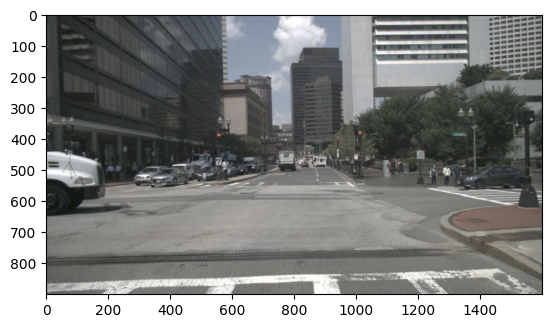

In [20]:
sample_0_data_CAM_FRONT_filename = os.path.join(dataroot, sample_0_data_CAM_FRONT['filename'])
import matplotlib.pyplot as plt
img = Image.open(samp_data_filename)
# img.show() # 会调用系统的显示窗口
plt.figure('image')
plt.imshow(img)
plt.show()


In [21]:
sample_0_anns_0 = nusc.get('sample_annotation', sample_0['anns'][0])
sample_0_anns_0

{'token': '0e0cc656b1db41c1abc6fe49329e1fc0',
 'sample_token': '3481dbfd65864925b4a4b2d6b7256d44',
 'instance_token': 'b5ecefb86982449dad8fb57ed28bdf2a',
 'visibility_token': '4',
 'attribute_tokens': ['c3246a1e22a14fcb878aa61e69ae3329'],
 'translation': [432.449, 1619.73, 1.073],
 'size': [2.294, 4.912, 1.717],
 'rotation': [0.2620544343851241, 0.0, 0.0, 0.965053093575215],
 'prev': '',
 'next': '5497b896ec004bcb9650c3d6106c08ab',
 'num_lidar_pts': 690,
 'num_radar_pts': 7,
 'category_name': 'vehicle.car'}

# global coordinate system to image(pixel)

In [ ]:
sensor = self.nusc.get('calibrated_sensor', sample_0['calibrated_sensor_token'])

In [ ]:
ax = plt.gca()
# 默认框的颜色是黑色，第一个参数是左上角的点坐标
# 第二个参数是宽，第三个参数是长
ax.add_patch(plt.Rectangle((100, 200), 200, 100, color="blue", fill=False, linewidth=1))

# 第三个参数是标签的内容
# bbox里面facecolor是标签的颜色，alpha是标签的透明度
ax.text(100, 200, "label 0.9", bbox={'facecolor':'blue', 'alpha':0.5})
